# 洗牌算法
- 分析洗牌算法正确性的准则：产生的结果必须有 n! 种可能，否则就是错误的。这个很好解释，因为一个长度为 n 的数组的全排列就有 n!

In [30]:
import random

In [31]:
def swap(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp

In [32]:
def shuffle(ls):
    n = len(ls)
    # 第一种写法
    # 整个过程产生的所有可能结果有 5*4*3*2*1=5!=n! 种
    for i in range(n):
        rand = random.randint(i, n-1)
        swap(ls, i, rand)

    # 第三种写法
    # 整个过程产生的所有可能结果仍然有 5*4*3*2=5!=n! 种
    # for i in range(n-1):
    #     rand = random.randint(i, n - 1)
    #     swap(ls, i, rand)


    # 第四种写法
    # 逆序 i--

    # 第五种写法
    # 逆序 i--

In [33]:
ls = []
for i in range(10):
    ls.append(i)
print(ls)
shuffle(ls)
ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[1, 0, 3, 5, 2, 9, 8, 6, 7, 4]

# 一种很隐蔽的谬误
- 这种写法得到的所有可能结果有 n^n 种，而不是 n! 种，而且 n^n 一般不可能是 n! 的整数倍。
- 比如说 arr = {1,2,3}，正确的结果应该有 3!=6 种可能，而这种写法总共有 3^3 = 27 种可能结果。因为 27 不能被 6 整除，也就是说总概率不可能被平分，一定有某些情况被「偏袒」了。

In [34]:
def not_shuffle(ls):
    n = len(ls)
    # 第一种写法
    # 整个过程产生的所有可能结果有 5*4*3*2*1=5!=n! 种
    for i in range(n):
        rand = random.randint(0, n-1)
        swap(ls, i, rand)

# 蒙特卡罗方法验证正确性
- 随机乱置算法的正确性衡量标准是：对于每种可能的结果出现的概率必须相等，也就是说要足够随机。

In [38]:
# 一种思路，我们把数组 arr 的所有排列组合都列举出来，做成一个直方图（假设 arr = {1,2,3}
# 每次进行洗牌算法后，就把得到的打乱结果对应的频数加一，重复进行 100 万次，如果每种结果出现的总次数差不多，
# 那就说明每种结果出现的概率应该是相等的。
# 蒙特卡罗
from collections import defaultdict
N = 100000
count = defaultdict(int)
for i in range(N):
    arr = [1,2,3]
    # shuffle(arr)
    not_shuffle(arr)
    str_arr = str(arr)
    count[str_arr] += 1

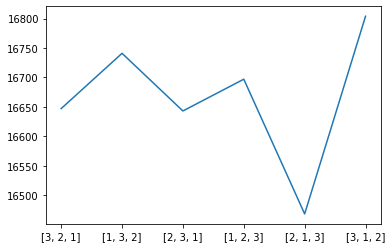

In [37]:
# shuffle
import matplotlib.pyplot as plt
keys = []
values = []
for k,v in count.items():
    keys.append(k)
    values.append(v)
plt.plot(keys, values)

[1, 2, 3] 14841
[2, 1, 3] 18317
[3, 1, 2] 14859
[1, 3, 2] 18480
[2, 3, 1] 18549
[3, 2, 1] 14954


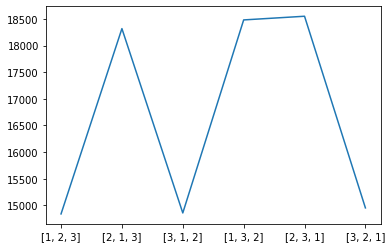

In [40]:
# not_shuffle
import matplotlib.pyplot as plt
keys = []
values = []
for k,v in count.items():
    print(k,v)
    keys.append(k)
    values.append(v)
plt.plot(keys, values)

In [ ]:
# 第二种思路，可以这样想，arr 数组中全都是 0，只有一个 1。我们对 arr 进行 100 万次打乱，
# 记录每个索引位置出现 1 的次数，如果每个索引出现 1 的次数差不多，
# 也可以说明每种打乱结果的概率是相等的。